![STV](stv.png)

# OCS - PROFILE TEMPLATE
## Catenary System, Fexible Hangers

Calculate a detailed wire profile utilizing the sum of moments methods.
Freely apply point loads or revise wire tensions.
Compare the wire positions under alternate design conditions.
*Input system data and point loads, output a detailed system graph and loading*

*The "_system" Python code module handles loading all other required references*

In [1]:
import _system as OCS

### ------INPUT DATA-------

#### LAYOUT DESIGN
*Data loaded from Sound Transit L800, wire run N51*

In [2]:
wirerunfilepath = 'InputData_none.csv'
wr = OCS.wire_run(wirerunfilepath)

#### CONDUCTOR PARTICULARS
*Input format is (MW(Weight, Tension), CW(Weight, Tension), HA Weight)*

*Nominal (installation) conditions. These set the hanger lengths*

In [3]:
cN = OCS.conductor_particulars((1.544, 5000), (1.063, 3300), 0.2)

#### POINT LOADS
*Lists should be the same length, input zero (0) if loads are applicable to only one of the cables. Positive (+) loads are in the downward direction. Weights applied on the contact wire will be transferred to the messenger wire through the adjacent hangers during solving of the catenary model. Loads entered should be discrete to what is physically applied to the cable.*
*Lists should be the same length and values seperated by commas (,)*
<br>`pN = (`
<br>`(list of load descriptions, for reference only)`
<br>`(list of station values associated with point loads)`
<br>`(list of weights applicable to the contact wire)`
<br>`(list of weights applicable to the messenger wire)`
<br>`)`

In [4]:
pN = (
('term span', 'uninsulated overlap', 'mpa z-anchor', 'mpa z-anchor', 'SI and feeders', 'insulated overlap', 'term span'),
(162442+30, 162442-15, 164755-25, 164755+25, 166379-15, 166980-15, 167160-30),
(15, 5, -15, -15, 30, 5, 15),
(15, 5, 0, 0, 85, 5, 15)
)

### ------SOLVE-------
*Solve flexible hanger catenary geometry utilizing the "_systems" module. Need to call "_solve" discretely*

In [5]:
Nominal = OCS.CatenaryFlexible(cN, wr)
Nominal.resetloads(pN)

### ------OUTPUT-------

*Generate sag plots of the wire elevations*

x 4863.0 y 47.5413616891572


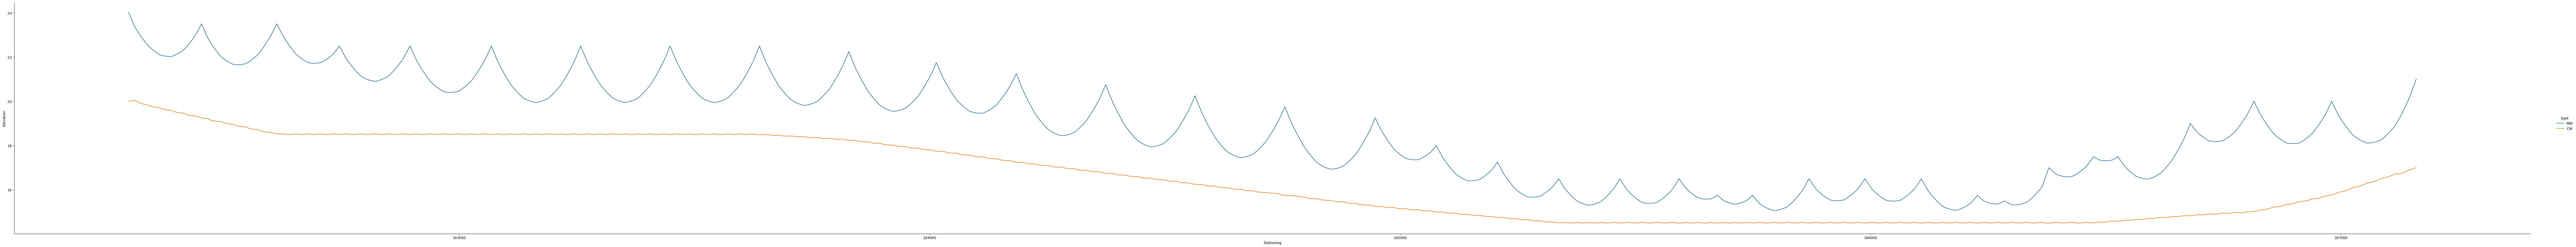

In [6]:
Nominal.plot()

*Generate plots of the loads at each hanger and at the MW supports*

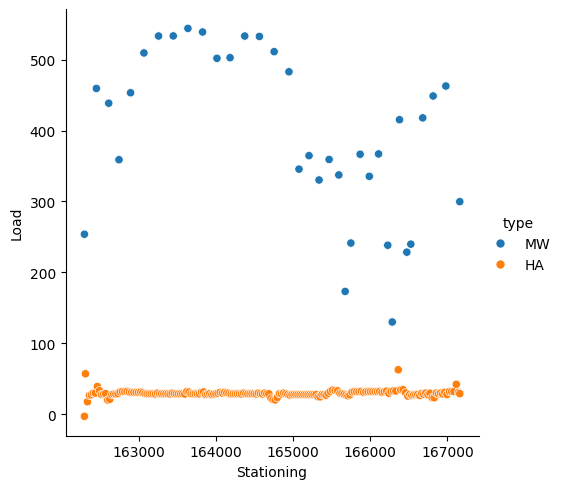

In [7]:
Nominal.plot_spt()

*Generate plots of the lengths for each hanger*

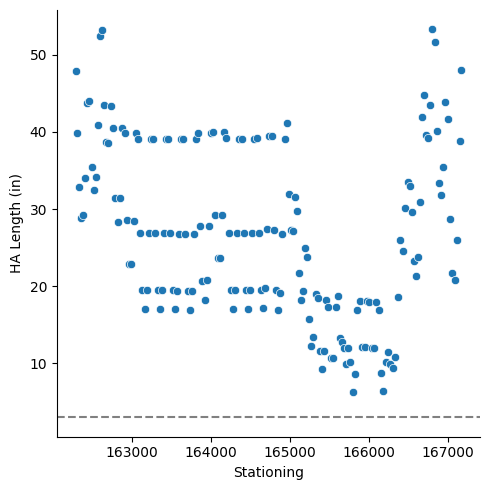

In [8]:
Nominal.plot_halength()